# Demonstration of Principal Component Analysis (PCA)

by **Ahmet Sacan,** modified by **Tony K. Okeke**

In [39]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from numpy import linalg as LA


def format(axis: plt.Axes) -> None:
    """Format Figure"""

    axis.spines[['top', 'right']].set_visible(False)
    axis.spines[['left', 'bottom']].set_linewidth(1.2)
    axis.xaxis.set_ticks_position('bottom')
    axis.yaxis.set_ticks_position('left')
    axis.minorticks_on()
    axis.grid(which='minor', linestyle=':', linewidth='0.5', color='red', 
              alpha=0.3)
    axis.grid(which='major', linestyle='-', linewidth='0.5', color='red', 
              alpha=0.5)
    

def printmat(X: np.ndarray) -> None:
    """
    Function for printing matrices.
    """

    for i in range(X.shape[0]):
        print('|', end='')
        for j in range(X.shape[1]):
            print(f'{X[i, j]:^10}', end='')
        print('|')
    print()

In [40]:
# Generate data
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

## Plot Raw Data

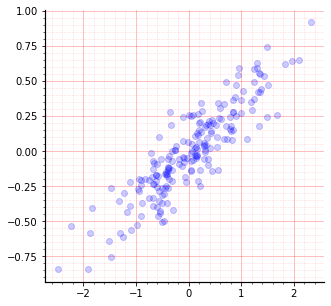

In [41]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X[:, 0], X[:, 1], 'bo', alpha=0.2)
format(ax)

## PCA

$$Y = XP$$

### Using `scikit-learn`

#### Calculate Principal Components

In [42]:
# Determine the principal components
pca = PCA(n_components=2)
pca.fit(X)

# Store results
P = pca.components_
Y = pca.transform(X)
V = pca.explained_variance_ratio_

# Print results
print(f"Percent Variance Explained: {V * 100}")
print(f"Cummulative Percent Variances: {np.cumsum(V*100)}")

Percent Variance Explained: [97.63410074  2.36589926]
Cummulative Percent Variances: [ 97.63410074 100.        ]


#### Plot Principal Components on the Original Data

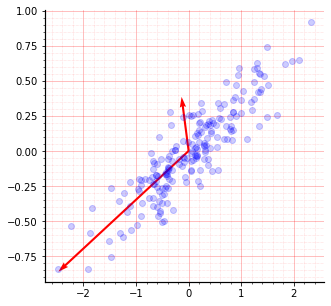

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))

# Plot raw data
ax.plot(X[:, 0], X[:, 1], 'bo', alpha=0.2)
format(ax)

# Plot principal components
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, 
              color='red')

#### Plot Projected Data

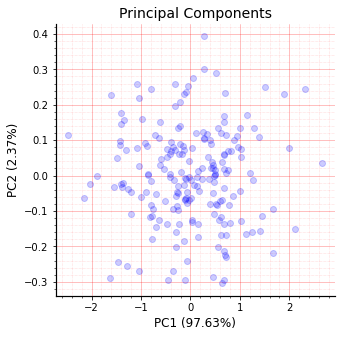

In [34]:
fig, ax = plt.subplots(figsize=(5, 5))

# Plot projected data
ax.plot(Y[:, 0], Y[:, 1], 'bo', alpha=0.2)
format(ax)

# Axis labels
ax.set_xlabel(f'PC1 ({V[0] * 100:.2f}%)', fontsize=12)
ax.set_ylabel(f'PC2 ({V[1] * 100:.2f}%)', fontsize=12)
ax.set_title('Principal Components', fontsize=14);

#### Reconstruct the Data

In [46]:
X_rec.shape

(200, 2)

In [57]:
P

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [56]:
P[:i+1, :]

array([[-0.94446029, -0.32862557]])

In [58]:
Y.shape

(200, 2)

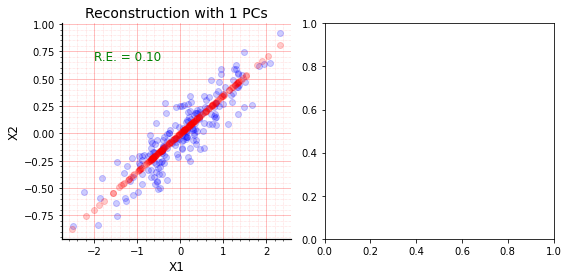

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for i, ax in zip(range(X.shape[1]), axes):
    # Reconstruct data
    X_rec = np.dot(Y[:, :i+1], P[:i+1, :])

    # Plot raw and reconstructed data
    ax.plot(X[:, 0], X[:, 1], 'bo', alpha=0.2)
    ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', alpha=0.2)
    format(ax)

    # Axis labels
    ax.set_xlabel('X1', fontsize=12)
    ax.set_ylabel('X2', fontsize=12)
    ax.set_title(f'Reconstruction with {i+1} PCs', fontsize=14)

    # Calculate reconstruction error (RMSE)
    error = math.sqrt( ((X - X_rec)**2).mean() )
    # error = mean_squared_error(X, X_rec, squared=False)

    ax.annotate(
        f'R.E. = {error:.2f}', xy=(0, 0), xytext=(-2, 0.7), color='green',
        fontsize=12, ha='left', va='center'
    )
    break

fig.tight_layout()

### From Scratch (using `numpy`)

In [7]:
# Generate some data
X = rng.randint([0, 0, 0, 0], [[10], [10]], dtype=np.uint8).T
printmat(X)

|    8         2     |
|    8         0     |
|    7         5     |
|    9         6     |



In [8]:
# Mean-shift data
X = (X - X.mean(axis=0))
printmat(X.round(2))

|   0.0      -1.25   |
|   0.0      -3.25   |
|   -1.0      1.75   |
|   1.0       2.75   |



In [9]:
# Calculate the scatter (covariance) matrix
Sx = np.dot(X.T, X) / (X.shape[0] - 1)
printmat(Sx.round(2))

|   0.67      0.33   |
|   0.33      7.58   |



In [13]:
# Eigendecomposition (D - eigenvalues, P - eigenvectors (principal components))
D, P = LA.eig(Sx)

print(f"Eigenvalues: {D.round(2)}")
print(f"Eigenvectors:")
printmat(P.round(2))

Eigenvalues: [0.65 7.6 ]
Eigenvectors:
|   -1.0     -0.05   |
|   0.05      -1.0   |



In [14]:
# Sort eigenvalues and eigenvectors
idx = D.argsort()[::-1]
D, P = D[idx], P[:, idx]

print(f"Eigenvalues: {D.round(2)}")
print(f"Eigenvectors:")
printmat(P.round(2))

Eigenvalues: [7.6  0.65]
Eigenvectors:
|  -0.05      -1.0   |
|   -1.0      0.05   |



In [15]:
# Calculate explained variance
V = D / D.sum()
print(f"Percent Variance Explained: {V.round(4)}")

Percent Variance Explained: [0.9211 0.0789]


In [16]:
# Transform data
Y = np.dot(X, P)
printmat(Y.round(2))

|   1.25     -0.06   |
|   3.25     -0.16   |
|   -1.7      1.08   |
|  -2.79     -0.87   |



In [18]:
Y * 

array([[ 1.24855761, -0.06003235],
       [ 3.2462498 , -0.1560841 ],
       [-1.69995478,  1.08289138],
       [-2.79485263, -0.86677493]])

In [21]:
# Reconstruct data
X_rec = np.dot(Y, P.T)
printmat(X_rec.round(2))

# Calculate reconstruction error (RMSE)
error = math.sqrt( ((X - X_rec)**2).mean() )
# error = mean_squared_error(X, X_rec, squared=False)

print(f"Reconstruction Error: {error:.2f}")

|   -0.0     -1.25   |
|   0.0      -3.25   |
|   -1.0      1.75   |
|   1.0       2.75   |

Reconstruction Error: 0.00


In [27]:
# Double check with sklearn
pca = PCA(n_components=2)
pca.fit(X)

# Store results
P = pca.components_


# Print results
print(f"Eigenvalues: {pca.explained_variance_.round(2)}")
print(f"Eigenvectors: ")
printmat(P.round(2))

Eigenvalues: [7.6  0.65]
Eigenvectors: 
|  -0.05      -1.0   |
|   -1.0      0.05   |



### Quiz Questions

In [2]:
# Variances & Covariances
p = np.array([20, 24, 17])
q = np.array([30, 20, 27])

sp2 = np.var(p, ddof=1)
sq2 = np.var(q, ddof=1)
spq = np.cov(p, q, ddof=1)[0, 1]
r = spq / np.sqrt(sp2 * sq2)

print(f"Variance of p: {sp2:.1f}")
print(f"Variance of q: {sq2:.1f}")
print(f"Covariance of p and q: {spq:.1f}")
print(f"Correlation of p and q: {r:.1f}")

Variance of p: 12.3
Variance of q: 26.3
Covariance of p and q: -13.3
Correlation of p and q: -0.7


In [37]:
# Explained Variance
X = np.array([
    [9,  5, 5],
    [7,  4, 5],
    [4,  8, 7],
    [10, 8, 8],
    [1,  2, 8]
])

# Mean shift data
X = (X - X.mean(axis=0))
printmat(X.round(1))

# Scatter matrix
Sx = np.dot(X.T, X) / (X.shape[0] - 1)
printmat(Sx.round(1))

# Eigendecomposition
D, P = LA.eig(Sx)

|   2.8       -0.4      -1.6   |
|   0.8       -1.4      -1.6   |
|   -2.2      2.6       0.4    |
|   3.8       2.6       1.4    |
|   -5.2      -3.4      1.4    |

|   13.7      4.9       -2.2   |
|   4.9       6.8       0.7    |
|   -2.2      0.7       2.3    |



In [38]:
D

array([16.42352369,  5.11218523,  1.26429109])

In [35]:
pca = PCA(n_components=3)
pca.fit(X);

Consider a Principal Component Analysis of a 2-dimensional data matrix X (that has already been mean-shifted).

The PCA of X has resulted in the following Principal Components Matrix:

0.8   -0.6
0.6    0.8

where columns are the principal components.

One of the data samples in X (i.e., one of the rows in X) is [6 7] (assume these values are already mean-shifted). After this sample is transformed into the principal component space, what would be the sum of its coordinates in the transformed space?

Provide your final answer rounded to one digit after the decimal point.

In [58]:
P = np.array([
    [0.8, -0.6],
    [0.6,  0.8]
])

# One row of X (mean-shifted)
X1 = np.array([6, 7])

# Project X1 onto P
Y1 = np.dot(X1, P)

# Sum of coordinates in transformed space
Y1.sum()

11.0